# Modify synthetic data

Modify existing synthetic data for standard survey to area-level data for each pupil: MSOA, IMD and RUC.

Not performed for symbol survey as anticipating sample size mean would only produce on whole area level.

## Data sources

| File and link |Description | Data accessed |
| --- | --- | --- |
| [MSOA 2021 shapefile](https://geoportal.statistics.gov.uk/datasets/608940e46ed649e3b00a5409befe31f8_0/explore) | This file contains MSOA boundaries for England and Wales as of 2021 - 'Middle layer Super Output Areas (December 2021) Boundaries EW BFC V6', published 11 July 2023  | 4 March 2024 |
| [IMD 2019 MSOA-level data](https://research.mysociety.org/sites/imd2019/about/) | This file "was produced by the University of Sheffield, in collaboration with the Ministry of Housing, Communities and Local Government, and mySociety." It is provided as a free public resource by mySociety. The file "includes the House of Commons Library MSOA Names for each MSOA in England, as well as which region it is in, an LSOA count for each MSOA, in addition to the population-weighted MSOA score and corresponding national rank, from 1 (most deprived) to 6,791 (least deprived). We have also provided columns for decile (where 1 is most deprived, 10 least deprived) and quintile (where 1 is most deprived, 5 is least deprived)." | 23 November 2023 |
| [Rural Urban Classification 2011 MSOA-level data](https://www.gov.uk/government/statistics/2011-rural-urban-classification-lookup-tables-for-all-geographies) | This file includes classification by OA, LSOA, MSOA and Ward. MSOA-level classification is determined based on the OA-level classes, and is based on the majority of the OAs. For example, for an LSOA of 6 OAs, if 3 or more of the output areas are classed as urban, then the LSOA is classed as urban, even if there were rural OAs in it. | 23 November 2023 |

## Set-up

### Packages and file paths

In [1]:
# Import required packages
from dataclasses import dataclass
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import pandas as pd
import random

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

In [2]:
# File paths
@dataclass(frozen=True)
class Paths:
    '''Stores paths to data and files'''
    survey_data = '../data/survey_data'
    standard = 'standard_synthetic_data_raw.csv'
    out_standard = 'standard_synthetic_data_raw_msoa.csv'

    area_data = '../data/area_data'
    england_wales_shp = 'MSOA_2021_EW_BFC_V6.zip'


paths = Paths()

## Import data

### Import the synthetic survey responses

In [3]:
standard = pd.read_csv(os.path.join(paths.survey_data, paths.standard))
standard.head()

,gender,transgender,sexual_orientation,neurodivergent,birth_parent1,birth_parent2,birth_you,birth_you_age,autonomy_pressure,autonomy_express,...,peer_talk_listen_lab,peer_talk_helpful_lab,peer_talk_if_lab,accept_peer_lab,year_group_lab,fsm_lab,sen_lab,ethnicity_lab,english_additional_lab,school_lab
0,4.0,2.0,6.0,3.0,2.0,NaN,2.0,1.0,2.0,5.0,...,Fully,Somewhat helpful,NaN,Not at all,Year 10,Non-FSM,Non-SEN,Ethnic minority,NaN,School E
1,NaN,2.0,1.0,3.0,3.0,2.0,3.0,8.0,4.0,2.0,...,NaN,NaN,Very uncomfortable,Slightly,Year 10,Non-FSM,Non-SEN,Ethnic minority,No,School D
2,2.0,3.0,4.0,1.0,1.0,1.0,1.0,1.0,5.0,4.0,...,NaN,NaN,Very comfortable,Not at all,Year 10,Non-FSM,Non-SEN,White British,No,School E
3,2.0,5.0,5.0,NaN,2.0,2.0,NaN,3.0,1.0,2.0,...,NaN,NaN,Uncomfortable,NaN,Year 10,Non-FSM,Non-SEN,White British,No,School G
4,5.0,3.0,4.0,1.0,1.0,3.0,3.0,2.0,5.0,2.0,...,Slightly,Somewhat helpful,NaN,Not at all,NaN,Non-FSM,Non-SEN,White British,Yes,School B


### Import area-level data

In [4]:
# Import shapefile of England and Wales
shp_full = gpd.read_file(os.path.join(paths.area_data, paths.england_wales_shp))

## Add random MSOA for each pupil

Based on all the MSOA in Northern Devon (but in reality anticipate some regions less likely, depending on the schools participating v.s. not)

In [5]:
def preview_gpd(df):
    '''
    Using the provided Geopandas dataframe, view the local authorities present,
    the head of the dataframe and a simple map of the data
    '''
    # List the local authorities present
    print(df['MSOA21NM'].str[:-4].sort_values().drop_duplicates())

    # Preview the dataframe
    display(df.head())

    # Create simple plot of the data
    fig, ax = plt.subplots()
    df.plot(ax=ax)
    ax.set_axis_off()

<mark>Need to remove Lundy Island from shapefile</mark>, LSOA E01020288, Torridge 005A, but issue is that it's an MSOA shapefile

4000    North Devon
4052       Torridge
Name: MSOA21NM, dtype: object


,MSOA21CD,MSOA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
4000,E02004175,North Devon 001,253249,146186,-4.10168,51.1960,9db2606f-d157-4977-bc1c-9779a55ae5d1,"POLYGON ((254804.600 148598.700, 254813.300 14..."
4001,E02004176,North Devon 002,266976,146638,-3.90550,51.2034,439b9ea1-e4d9-4904-b1c0-f9a1d8d04408,"POLYGON ((275519.660 151187.050, 275518.060 15..."
4002,E02004177,North Devon 003,250974,146005,-4.13414,51.1938,6f7da272-6e2a-4a5f-b211-99afe33c7c22,"POLYGON ((251917.000 148047.000, 251913.000 14..."
4003,E02004178,North Devon 004,249373,141456,-4.15512,51.1525,f2163d7c-4ddd-4296-b2b7-eed7fb13d89a,"POLYGON ((246316.689 146903.165, 246325.212 14..."
4004,E02004179,North Devon 005,251236,135605,-4.12609,51.1004,f659f2bf-7823-41c4-a9b6-984dbef89dee,"POLYGON ((248309.172 139222.177, 248310.609 13..."


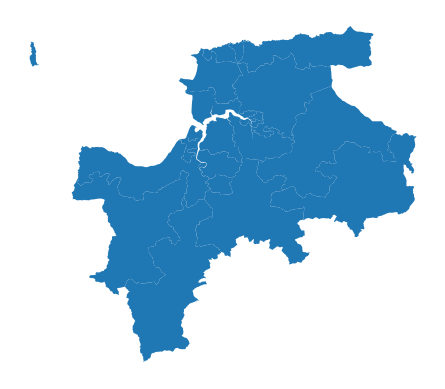

In [6]:
# Filter to MSOA in North Devon or Torridge
la_nd = 'North Devon|Torridge'
shp_nd = shp_full[shp_full['MSOA21NM'].str.contains(la_nd)]
preview_gpd(shp_nd)

In [7]:
# Randomly choose an MSOA for each pupil
random.seed(42)
standard['msoa'] = random.choices(list(shp_nd['MSOA21NM']), k=len(standard.index))

# Randomly drop a few from each dataset
standard['msoa'] = standard['msoa'].sample(n=len(standard) - 25)

# Preview
display(standard.head())

,gender,transgender,sexual_orientation,neurodivergent,birth_parent1,birth_parent2,birth_you,birth_you_age,autonomy_pressure,autonomy_express,...,peer_talk_helpful_lab,peer_talk_if_lab,accept_peer_lab,year_group_lab,fsm_lab,sen_lab,ethnicity_lab,english_additional_lab,school_lab,msoa
0,4.0,2.0,6.0,3.0,2.0,NaN,2.0,1.0,2.0,5.0,...,Somewhat helpful,NaN,Not at all,Year 10,Non-FSM,Non-SEN,Ethnic minority,NaN,School E,Torridge 001
1,NaN,2.0,1.0,3.0,3.0,2.0,3.0,8.0,4.0,2.0,...,NaN,Very uncomfortable,Slightly,Year 10,Non-FSM,Non-SEN,Ethnic minority,No,School D,North Devon 001
2,2.0,3.0,4.0,1.0,1.0,1.0,1.0,1.0,5.0,4.0,...,NaN,Very comfortable,Not at all,Year 10,Non-FSM,Non-SEN,White British,No,School E,North Devon 007
3,2.0,5.0,5.0,NaN,2.0,2.0,NaN,3.0,1.0,2.0,...,NaN,Uncomfortable,NaN,Year 10,Non-FSM,Non-SEN,White British,No,School G,North Devon 006
4,5.0,3.0,4.0,1.0,1.0,3.0,3.0,2.0,5.0,2.0,...,Somewhat helpful,NaN,Not at all,NaN,Non-FSM,Non-SEN,White British,Yes,School B,Torridge 003


## Save to csv

In [8]:
standard.to_csv(os.path.join(paths.survey_data, paths.out_standard),
                index=False)